In [2]:
import pandas as pd


In [3]:
corona = pd.read_csv(r'C:\Users\Jws\Documents\ubion\csv\corona.csv') 

In [4]:
corona.drop('Unnamed: 0', axis = 1,
            inplace = True)
corona.rename(
    columns = {
      'createDt' : '등록일시',
      'deathCnt' : '총사망자',
      'decideCnt' : '총확진자',
      'seq' : '게시글번호',
      'stateDt' : '기준일',
      'stateTime' : '기준시간',
      'updateDt' : '수정일시',
      'accExamCnt' : '누적의심자',
      'accDefRate' : '누적확진율' 
    } 
) 
corona.columns = ['등록일시', '총사망자', '총확진자', '게시글번호', '기준일', '기준시간', '수정일시', '누적의심자', '누적확진율']
corona.sort_values(
    ['등록일시'],
    ascending = True,
    inplace = True
)
corona.reset_index(drop = True,
                  inplace = True)
corona['일일사망자'] = corona['총사망자'] - corona['총사망자'].shift(1)
corona['일일확진자'] = corona['총확진자'].diff(1)
corona.iloc[444:449,]

,등록일시,총사망자,총확진자,게시글번호,기준일,기준시간,수정일시,누적의심자,누적확진율,일일사망자,일일확진자
444,2021-05-29 00:00:00.000,1951,139427,496,20210529,00:00,2021-10-07 10:30:51.51,9733588.0,1.450884,5.0,533.0
445,2021-05-30 00:00:00.0,1959,140337,498,20210531,00:00,2021-10-14 13:48:56.821,9761156.0,1.456805,8.0,910.0
446,2021-05-30 00:00:00.000,1957,139907,497,20210530,00:00,2021-10-07 10:30:51.51,9747612.0,1.454166,-2.0,-430.0
447,2021-06-01 00:00:00.000,1963,140796,499,20210601,00:00,2021-10-07 10:30:51.51,9798400.0,1.455890,6.0,889.0
448,2021-06-02 00:00:00.000,1965,141473,500,20210602,00:00,2021-10-07 10:30:51.51,9834348.0,1.457668,2.0,677.0


In [5]:
corona.loc[445,'등록일시'] = '2021-05-31 00:00:00.000'
corona= corona.drop(['일일사망자', '일일확진자'], axis = 1)
corona.sort_values(
    ['등록일시'],
    ascending = True,
    inplace = True)
corona.reset_index(drop = True,
                   inplace = True)
corona['일일사망자'] = corona['총사망자'] - corona['총사망자'].shift(1) 
corona['일일확진자'] = corona['총확진자'].diff(1)
corona.describe()   

,총사망자,총확진자,게시글번호,기준일,누적의심자,누적확진율,일일사망자,일일확진자
count,820.000000,8.200000e+02,820.000000,8.200000e+02,6.920000e+02,623.000000,819.000000,819.000000
mean,3927.832927,1.913097e+06,472.393902,2.020897e+07,7.545057e+06,1.556435,29.610501,22198.641026
std,6164.310693,4.857030e+06,249.701095,7.118265e+03,6.172020e+06,0.543014,68.564505,71053.003870
min,54.000000,7.513000e+03,51.000000,2.020031e+07,2.101440e+05,0.902205,0.000000,2.000000
25%,415.750000,2.393525e+04,256.750000,2.020100e+07,1.934309e+06,1.078089,2.000000,125.500000
50%,1812.500000,1.185640e+05,461.500000,2.021042e+07,6.368310e+06,1.416159,5.000000,634.000000
75%,3120.500000,3.979915e+05,698.250000,2.021112e+07,1.216890e+07,1.816009,20.000000,2797.500000
max,24305.000000,1.818820e+07,904.000000,2.022061e+07,2.151807e+07,3.919308,469.000000,621204.000000


In [6]:
!pip install matplotlib

     ---------------------------------------- 0.0/162.6 kB ? eta -:--:--
     -------------------------------------- 162.6/162.6 kB 4.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.6 MB ? eta -:--:--
   -------- ------------------------------- 1.7/7.6 MB 54.5 MB/s eta 0:00:01
   ---------------------- ----------------- 4.2/7.6 MB 54.2 MB/s eta 0:00:01
   ----------------------------------- ---- 6.7/7.6 MB 53.5 MB/s eta 0:00:01
   ---------------------------------------- 7.6/7.6 MB 44.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/187.7 kB ? eta -:--:--
   --------------------------------------- 187.7/187.7 kB 11.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------  2.2/2.2 MB 46.0 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 34.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/56.0 kB ? eta -:--:--
   -----------------------

In [9]:
corona.head()

,등록일시,총사망자,총확진자,게시글번호,기준일,기준시간,수정일시,누적의심자,누적확진율,일일사망자,일일확진자
0,2020-03-10 00:00:00.000,54,7513,51,20200310,00:00,2021-10-07 10:30:51.51,210144.0,3.919308,NaN,NaN
1,2020-03-11 00:00:00.000,60,7755,52,20200311,00:00,2021-10-07 10:30:51.51,222395.0,3.804175,6.0,242.0
2,2020-03-12 00:00:00.000,66,7869,53,20200312,00:00,2021-10-07 10:30:51.51,234998.0,3.621744,6.0,114.0
3,2020-03-13 00:00:00.000,67,7979,54,20200313,00:00,2021-10-07 10:30:51.51,248647.0,3.458499,1.0,110.0
4,2020-03-14 00:00:00.000,72,8086,55,20200314,00:00,2021-10-07 10:30:51.51,261335.0,3.318000,5.0,107.0


In [10]:
corona.loc[0,'일일사망자'] = 0
corona.loc[0,'일일확진자'] = 0
corona.head()

# corona[['일일사망자','일일확진자']].fillna(0)

,등록일시,총사망자,총확진자,게시글번호,기준일,기준시간,수정일시,누적의심자,누적확진율,일일사망자,일일확진자
0,2020-03-10 00:00:00.000,54,7513,51,20200310,00:00,2021-10-07 10:30:51.51,210144.0,3.919308,0.0,0.0
1,2020-03-11 00:00:00.000,60,7755,52,20200311,00:00,2021-10-07 10:30:51.51,222395.0,3.804175,6.0,242.0
2,2020-03-12 00:00:00.000,66,7869,53,20200312,00:00,2021-10-07 10:30:51.51,234998.0,3.621744,6.0,114.0
3,2020-03-13 00:00:00.000,67,7979,54,20200313,00:00,2021-10-07 10:30:51.51,248647.0,3.458499,1.0,110.0
4,2020-03-14 00:00:00.000,72,8086,55,20200314,00:00,2021-10-07 10:30:51.51,261335.0,3.318000,5.0,107.0


<Axes: >

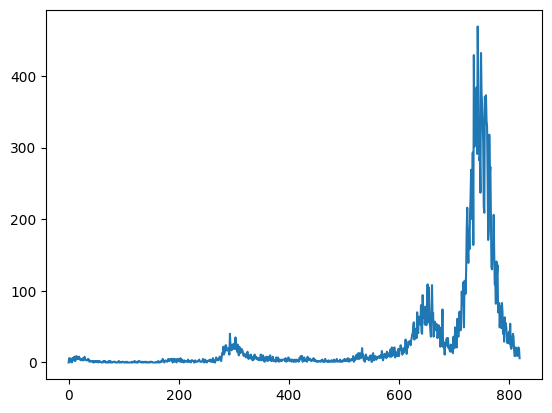

In [11]:
corona['일일사망자'].plot()

<Axes: >

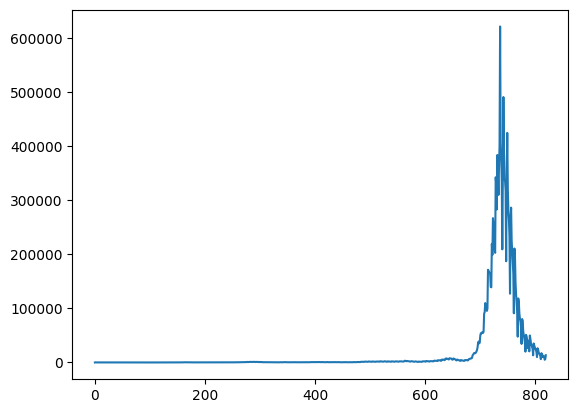

In [12]:
corona['일일확진자'].plot()

In [15]:
(corona[['일일사망자','일일확진자']] <  0).any()                 # 인덱스의 값을 모아서 하나라도 음수(True)가 있는지 확인

일일사망자    False
일일확진자    False
dtype: bool

In [16]:
flag = (corona[['일일사망자','일일확진자']] <  0).any(axis = 1)
corona.loc[flag]                            # 아무것도 안뜨니 음수인 데이터가 없다.

,등록일시,총사망자,총확진자,게시글번호,기준일,기준시간,수정일시,누적의심자,누적확진율,일일사망자,일일확진자
